In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("books.csv", error_bad_lines=False)

C:\Users\sonia\AppData\Local\Temp\ipykernel_10412\3436638666.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("books.csv", error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.shape


(11123, 12)

In [4]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [8]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [9]:
df.describe(include = 'object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [10]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [11]:
df.duplicated().any()

False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [13]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [14]:
df.isbn.nunique()

11123

In [15]:
df.isbn13.nunique()

11123

In [16]:
df.drop(['bookID', 'isbn', 'isbn13'], axis = 1, inplace = True)

In [17]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [18]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [19]:
df['year'] = df['publication_date'].str.split('/')

In [20]:
df['year'] = df['year'].apply(lambda x: x[2])

In [21]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [22]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [26]:
df['year'] = df['year'].astype('int')

In [27]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int32
dtype: object

In [28]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [29]:
df['year'].min()

1900

In [30]:
df['year'].max()

2020

In [31]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [32]:
df[df['year'] == 2020][['title', 'authors','average_rating','language_code','publisher' ]]

,title,authors,average_rating,language_code,publisher
9664,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [33]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

In [34]:
plt.figure(figsize = (20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='authors', ylabel='count'>

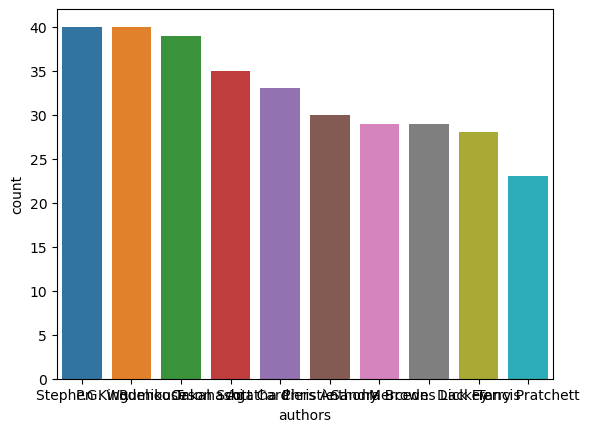

In [35]:
sns.countplot(x = 'authors', data = df,
             order = df['authors'].value_counts().iloc[:10].index)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

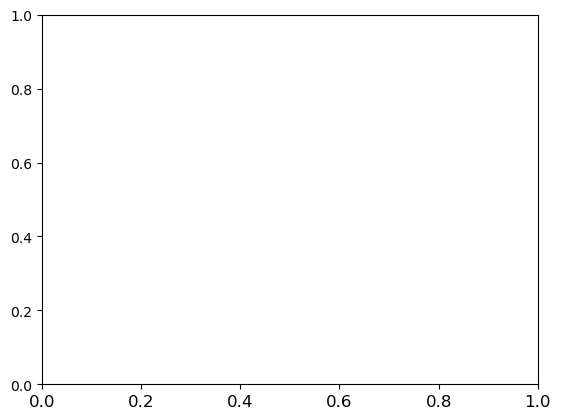

In [36]:
plt.xticks(fontsize = 12)

In [37]:
plt.show()

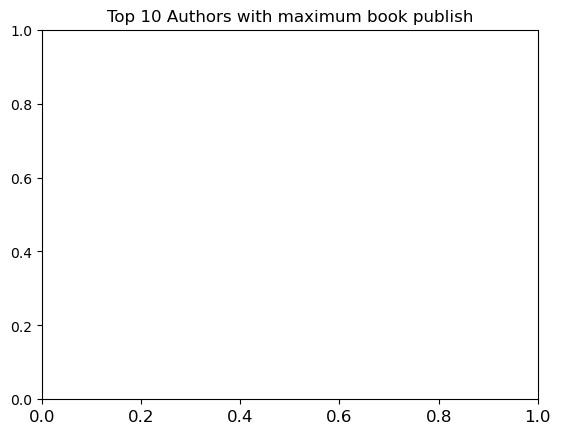

In [38]:
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

In [39]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [40]:
df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [41]:
df.groupby(['language_code'])[['average_rating', 
                               'ratings_count', 
                               'text_reviews_count']].agg('mean').style.background_gradient(cmap = 'Wistia')


,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [42]:
book = df['title'].value_counts()[:20]
book

The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Sense and Sensibility         6
Robinson Crusoe               6
Treasure Island               6
Jane Eyre                     6
Romeo and Juliet              6
Collected Stories             6
The Secret Garden             6
The Scarlet Letter            6
The Great Gatsby              6
Frankenstein                  5
Name: title, dtype: int64

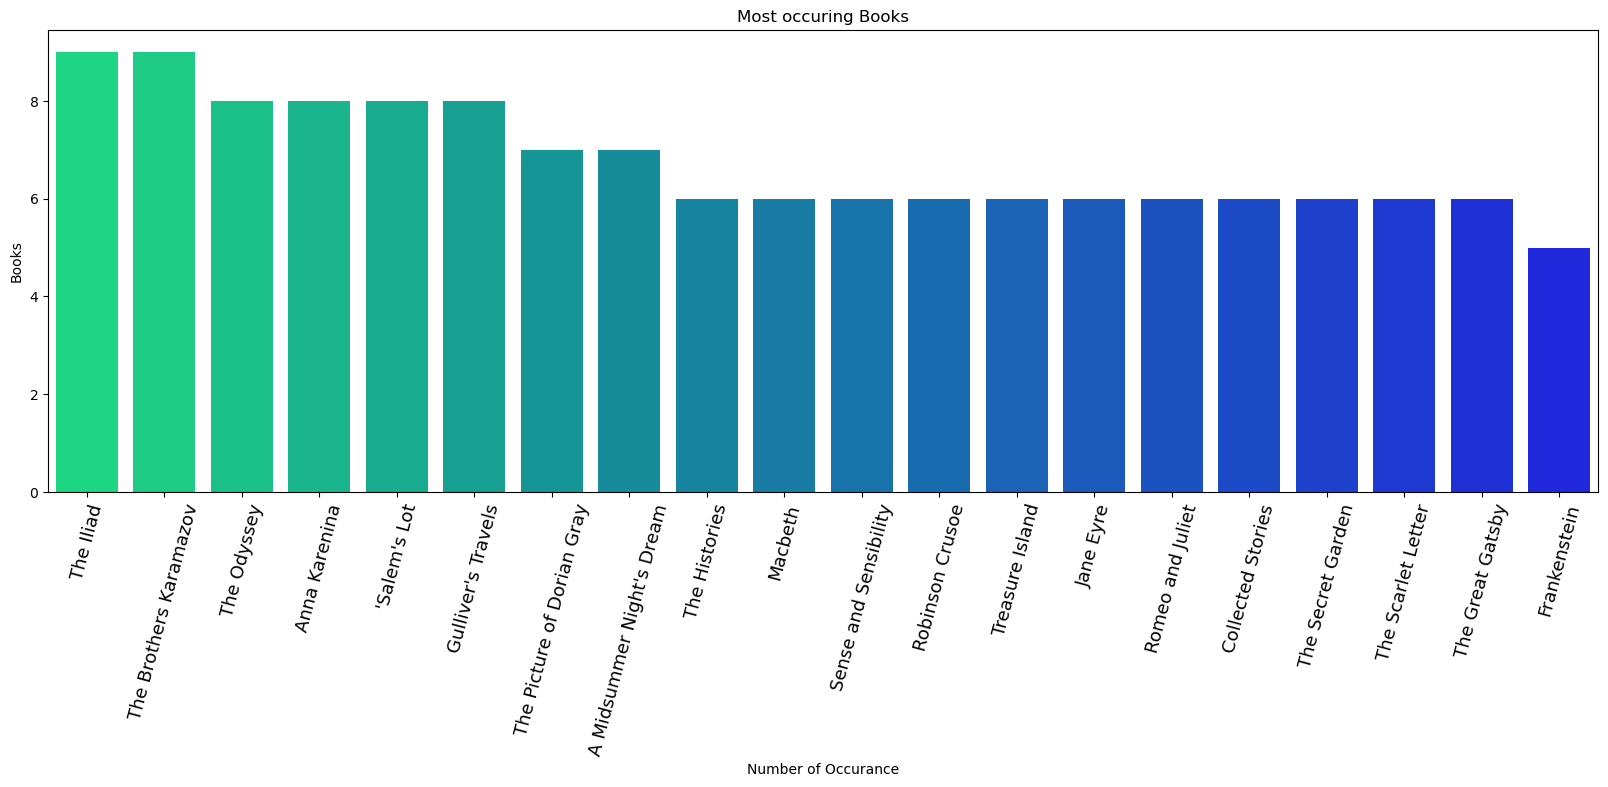

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


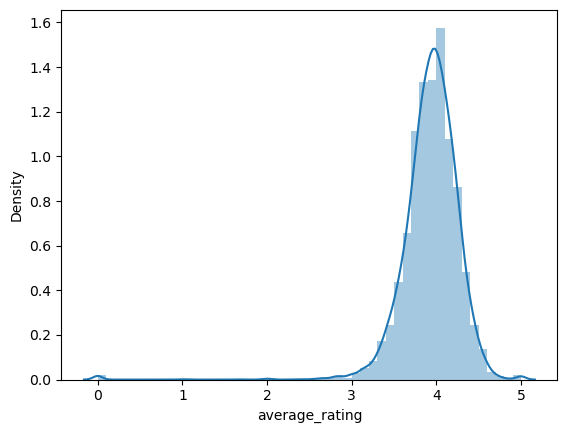

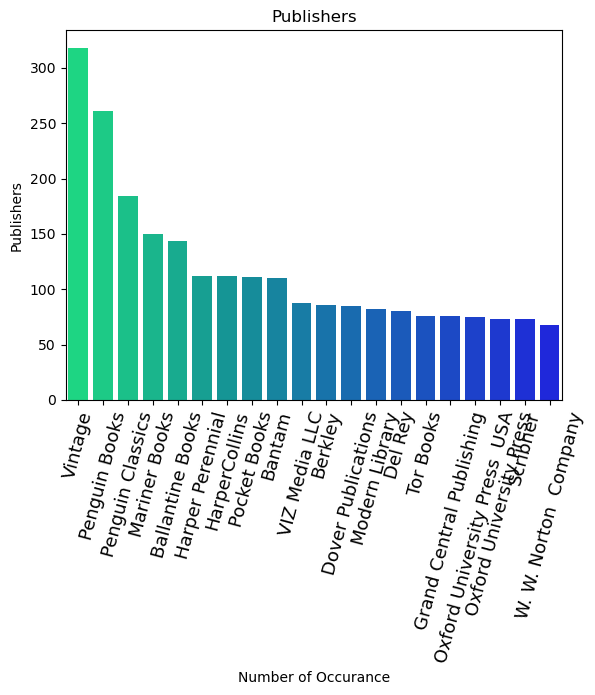

In [43]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()
sns.distplot(df['average_rating'])
plt.show()
df[df.average_rating == df.average_rating.max()][['title','authors','language_code','publisher']]
publisher = df['publisher'].value_counts()[:20]
publisher
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

In [44]:
df.publisher.value_counts()
df.columns
def recomd_books_publisheres(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)
recomd_books_publisheres('Vintage')
recomd_books_publisheres('Penguin Books')
@interact
def recomd_books_publishers(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)
df.columns
@interact
def recomd_books_authors(authors_name = list(df['authors'].value_counts().index)):
    a = df[df['authors'] == authors_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)
df.columns
@interact
def recomd_books_lang(language = list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == language][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

interactive(children=(Dropdown(description='authors_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko …

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

In [46]:
# data preproecessing

df.head(2)

def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
df['rating_obj'] = df['average_rating'].apply(num_to_obj)
df['rating_obj'].value_counts()
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()
df.columns
language_df = pd.get_dummies(df['language_code'])
language_df.head()

features = pd.concat([rating_df,language_df, df['average_rating'],
                    df['ratings_count'], df['title']], axis = 1)
features.set_index('title', inplace= True)
features.head()


from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [47]:
# model building
from sklearn import neighbors


In [48]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm = 'ball_tree',
                                  metric = 'euclidean')

In [49]:
model.fit(features_scaled)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [50]:
dist, idlist = model.kneighbors(features_scaled)

In [51]:
df['title'].value_counts()

The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

In [52]:
@interact
def BookRecomender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name]
    
    if not book_id.empty:
        book_id = book_id.index[0]  # Access the index of the first matching book
    
        for newid in idlist[book_id]:
            book_list_name.append(df.iloc[newid].title)
    
    return book_list_name


interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Example true ratings or preferences
y_true = [4.4,4.7,4.21,4.18,3.54,4.05,3.84,4.46,3.77,3.55]  # Actual ratings or preferences

# Example predicted ratings
y_pred = [4.53,4.51,4.42,4.40,4.36,4.35,4.30,4.30,4.28,4.28]  # Predicted ratings

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.19381000000000015
Root Mean Squared Error (RMSE): 0.44023857168585323


In [61]:
# Example true ratings or preferences
y_true = [4.4,4.7,4.21,4.18,3.54,4.05,3.84,4.46,3.77,3.55]  # Actual ratings or preferences

# Example predicted ratings
y_pred = [4.53,4.51,4.42,4.40,4.36,4.35,4.30,4.30,4.28,4.28]  # Predicted ratings

# Set a threshold for binary classification (e.g., 3.5 as the threshold)
threshold = 3.5

# Convert predicted ratings into binary values (positive/negative)
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]

# Calculate accuracy for the binary classification task
accuracy = accuracy_score(y_true, y_pred_binary)


NameError: name 'accuracy_score' is not defined

In [72]:
pip install tensorflow numpy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [54]:
pip install protobuf==3.20.1


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.



  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


In [56]:
export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


SyntaxError: invalid syntax (4223291981.py, line 1)

In [57]:
import numpy as np
import tensorflow as tf

# Generate some mock data (replace this with your actual data)
# Users and items
num_users = 100
num_items = 200
user_ratings = np.random.randint(1, 6, size=(num_users, num_items))

# Define the model
embedding_dim = 10  # Dimensionality of user and item embeddings
user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
item_input = tf.keras.layers.Input(shape=(1,), name='item_input')

user_embedding = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, input_length=1)(user_input)
item_embedding = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, input_length=1)(item_input)

user_vecs = tf.keras.layers.Flatten()(user_embedding)
item_vecs = tf.keras.layers.Flatten()(item_embedding)

prod = tf.keras.layers.Dot(axes=1)([user_vecs, item_vecs])
model = tf.keras.models.Model(inputs=[user_input, item_input], outputs=prod)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    history = model.fit([user_indices, item_indices], user_ratings, batch_size=64, epochs=1, verbose=1)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {history.history['loss'][0]}")

# Make predictions
user_indices = np.array([0, 1, 2])  # Replace with user indices
item_indices = np.array([3, 4, 5])  # Replace with book/item indices
predictions = model.predict([user_indices, item_indices])

# You can use the predictions for recommendations
print("Predictions:", predictions)


AttributeError: module 'tensorflow' has no attribute 'keras'

In [60]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample ground truth and predicted labels (replace with your actual data)
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not liked', 'Liked'], yticklabels=['Not liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ValueError: continuous is not supported

In [80]:
# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate additional metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

ValueError: too many values to unpack (expected 4)

In [81]:
# Calculate metrics from the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define the elements of the confusion matrix
tn = cm[0, 0]  # True Negatives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives
tp = cm[1, 1]  # True Positives

# Calculate additional metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[2 3]
 [2 3]]
Accuracy: 0.5
Precision: 0.5
Recall: 0.6
F1 Score: 0.5454545454545454


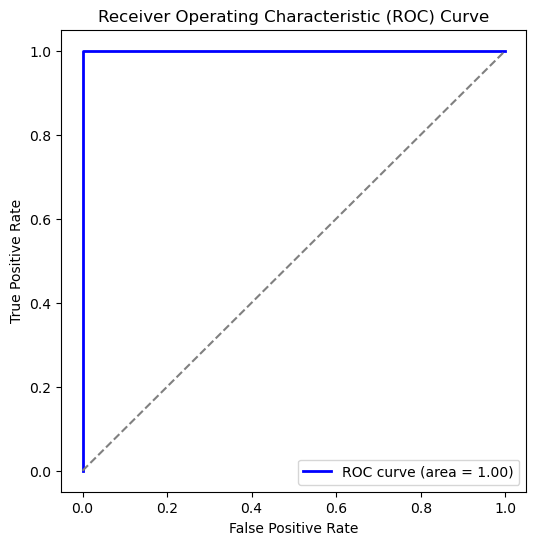

AUC Score: 1.0


In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Use the same example data (replace it with your actual data)
true_labels = [1, 0, 1, 0, 1, 0]  # Actual user preferences (1: liked, 0: didn't like)
predicted_scores = [0.8, 0.3, 0.6, 0.2, 0.7, 0.4]  # Example predicted scores

# Calculate AUC
auc_score = roc_auc_score(true_labels, predicted_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print("AUC Score:", auc_score)
